# Modelling Tyre Deg with Linear Regression

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


We need to decide when a tyre is unusable via the throttle vs. speed or brakes vs. speed, RPM vs. throttle

Let's look at what the comparision is like when the tyre is new

In [14]:
laptimes = pd.read_csv('training_data_for_tire_deg/laptimes_data.csv')
telemetry = pd.read_csv('training_data_for_tire_deg/telemetry_data.csv')
weather = pd.read_csv('training_data_for_tire_deg/weather_data.csv')

telemetry.head()

,Time,RPM,Speed,Throttle,Brake,Status
0,0 days 00:00:00,3707.310726,33.000000,0.000000,False,OnTrack
1,0 days 00:00:00.141000,3734.000000,33.000000,0.000000,False,OnTrack
2,0 days 00:00:00.305000,3760.422222,33.455556,2.277778,False,OnTrack
3,0 days 00:00:00.501000,3792.000000,34.000000,5.000000,False,OnTrack
4,0 days 00:00:00.585000,3930.075000,35.050000,5.000000,False,OnTrack


In [15]:
telemetry.loc[telemetry['Throttle'] != 0.0]

,Time,RPM,Speed,Throttle,Brake,Status
2,0 days 00:00:00.305000,3760.422222,33.455556,2.277778,False,OnTrack
3,0 days 00:00:00.501000,3792.000000,34.000000,5.000000,False,OnTrack
4,0 days 00:00:00.585000,3930.075000,35.050000,5.000000,False,OnTrack
5,0 days 00:00:00.661000,4055.000000,36.000000,5.000000,False,OnTrack
6,0 days 00:00:00.745000,4219.220000,36.840000,5.840000,False,OnTrack
...,...,...,...,...,...,...
28475,0 days 00:01:16.922000,4730.512194,50.825002,10.174998,False,OnTrack
28476,0 days 00:01:16.936000,4697.000000,51.000000,10.000000,False,OnTrack
28477,0 days 00:01:17.341000,5125.932022,53.761365,25.647735,False,OnTrack
28478,0 days 00:01:17.376000,5163.000000,54.000000,27.000000,False,OnTrack


In [16]:
telemetry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28480 entries, 0 to 28479
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      28480 non-null  object 
 1   RPM       28480 non-null  float64
 2   Speed     28480 non-null  float64
 3   Throttle  28480 non-null  float64
 4   Brake     28480 non-null  bool   
 5   Status    28480 non-null  object 
dtypes: bool(1), float64(3), object(2)
memory usage: 1.1+ MB


We need to pick a fast lap from laptimes_data.csv and review telemetry

In [17]:
laptimes

,Time,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Compound,TyreLife,FreshTyre,LapStartTime,LapStartDate
0,0 days 00:14:41.485000,0 days 00:01:41.973000,1.0,1.0,0 days 00:13:00.703000,NaN,MEDIUM,1.0,True,0 days 00:13:00.703000,2024-05-24 11:30:52.936
1,0 days 00:16:01.681000,0 days 00:01:20.196000,2.0,1.0,NaN,NaN,MEDIUM,2.0,True,0 days 00:14:41.485000,2024-05-24 11:32:33.718
2,0 days 00:17:18.908000,0 days 00:01:17.227000,3.0,1.0,NaN,NaN,MEDIUM,3.0,True,0 days 00:16:01.681000,2024-05-24 11:33:53.914
3,0 days 00:18:44.851000,0 days 00:01:25.943000,4.0,1.0,NaN,NaN,MEDIUM,4.0,True,0 days 00:17:18.908000,2024-05-24 11:35:11.141
4,0 days 00:20:00.749000,0 days 00:01:15.898000,5.0,1.0,NaN,NaN,MEDIUM,5.0,True,0 days 00:18:44.851000,2024-05-24 11:36:37.084
5,0 days 00:21:33.871000,0 days 00:01:33.122000,6.0,1.0,NaN,NaN,MEDIUM,6.0,True,0 days 00:20:00.749000,2024-05-24 11:37:52.982
6,0 days 00:22:57.924000,0 days 00:01:24.053000,7.0,1.0,NaN,NaN,MEDIUM,7.0,True,0 days 00:21:33.871000,2024-05-24 11:39:26.104
7,0 days 00:24:13.190000,0 days 00:01:15.266000,8.0,1.0,NaN,NaN,MEDIUM,8.0,True,0 days 00:22:57.924000,2024-05-24 11:40:50.157
8,0 days 00:25:59.040000,0 days 00:01:45.850000,9.0,1.0,NaN,NaN,MEDIUM,9.0,True,0 days 00:24:13.190000,2024-05-24 11:42:05.423
9,0 days 00:27:13.380000,0 days 00:01:14.340000,10.0,1.0,NaN,NaN,MEDIUM,10.0,True,0 days 00:25:59.040000,2024-05-24 11:43:51.273


Lap number 5 seems fast

In [25]:
laptimes.loc[laptimes['LapNumber'] == 19.0, ['LapStartTime', 'Compound', 'TyreLife', 'FreshTyre', 'LapNumber']]

,LapStartTime,Compound,TyreLife,FreshTyre,LapNumber
18,0 days 00:46:26.209000,SOFT,2.0,True,19.0


In [29]:

import fastf1

session = fastf1.get_session(2024, 'Monaco', 'FP1')
session.load()

driver_laps = session.laps.pick_driver('TSU')
lap = driver_laps.pick_lap(19.0)
lap_3_telemetry = lap.get_telemetry()
lap_3_telemetry

core           INFO 	Loading data for Monaco Grand Prix - Practice 1 [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
c:\Users\chchr\Python Projects\F1 Project\.venv\Lib\site-packages\fastf1\core.py:3067: FutureWarning: pick_dri

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2024-05-24 12:04:18.442,0 days 00:46:26.209000,,1692.635833,0 days 00:00:00,10621.754901,267.559997,6,100.0,False,12,interpolation,0.570615,0.000174,OnTrack,-7666.246344,-6560.984176,502.442426
3,2024-05-24 12:04:18.564,0 days 00:46:26.331000,,1692.635833,0 days 00:00:00.122000,10716.000000,270.000000,7,100.0,False,12,car,9.767778,0.002972,OnTrack,-7670.405957,-6485.884347,502.881955
4,2024-05-24 12:04:18.615,0 days 00:46:26.382000,,1692.635833,0 days 00:00:00.173000,10740.225030,270.765001,7,100.0,False,12,pos,13.624760,0.004146,OnTrack,-7672.000000,-6444.000000,503.000000
5,2024-05-24 12:04:18.764,0 days 00:46:26.531000,3,1692.635833,0 days 00:00:00.322000,10811.000000,273.000000,7,100.0,False,12,car,24.934444,0.007587,OnTrack,-7676.147542,-6286.539042,503.123494
6,2024-05-24 12:04:18.895,0 days 00:46:26.662000,3,1692.053611,0 days 00:00:00.453000,10884.141702,274.091667,7,100.0,False,12,pos,34.928290,0.010628,OnTrack,-7677.000000,-6140.000000,503.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,2024-05-24 12:05:46.295,0 days 00:47:54.062000,2,83.853607,0 days 00:01:27.853000,11313.937360,259.421876,6,100.0,False,12,pos,3242.629760,0.986708,OnTrack,-7643.000000,-6904.000000,502.000000
658,2024-05-24 12:05:46.524,0 days 00:47:54.291000,2,67.378333,0 days 00:01:28.082000,10813.000000,263.000000,6,100.0,False,12,car,3259.411111,0.991815,OnTrack,-7654.150832,-6764.035400,501.828148
659,2024-05-24 12:05:46.756,0 days 00:47:54.523000,2,67.378333,0 days 00:01:28.314000,10702.800000,266.866667,6,100.0,False,12,pos,3276.674058,0.997068,OnTrack,-7661.000000,-6641.000000,502.000000
660,2024-05-24 12:05:46.815,0 days 00:47:54.582000,2,67.378333,0 days 00:01:28.373000,10674.774970,267.850001,6,100.0,False,12,pos,3281.106188,0.998416,OnTrack,-7663.000000,-6597.000000,502.000000


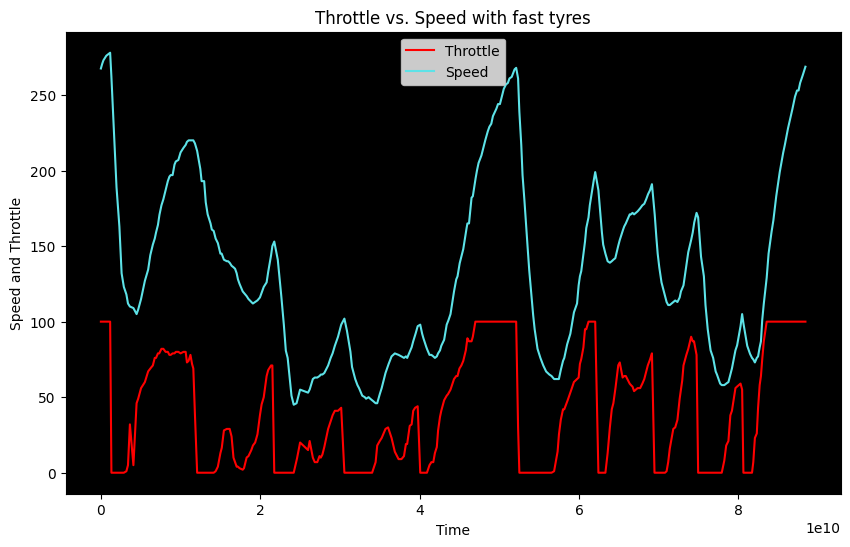

In [30]:
# graph for lap 4 (fast lap)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(lap_3_telemetry['Time'], lap_3_telemetry['Throttle'], color='red')
ax.plot(lap_3_telemetry['Time'], lap_3_telemetry['Speed'], color='#5DE2E7')
ax.set_facecolor('black')
ax.set_xlabel('Time')
ax.set_ylabel('Speed and Throttle')
ax.set_title('Throttle vs. Speed with fast tyres')
ax.legend(labels=['Throttle', 'Speed'])
plt.savefig('plots/throttle_speed.png')

c:\Users\chchr\Python Projects\F1 Project\.venv\Lib\site-packages\fastf1\core.py:3021: FutureWarning: pick_lap is deprecated and will be removed in a future release. Use pick_laps instead.
  warnings.warn(("pick_lap is deprecated and will be removed in a "


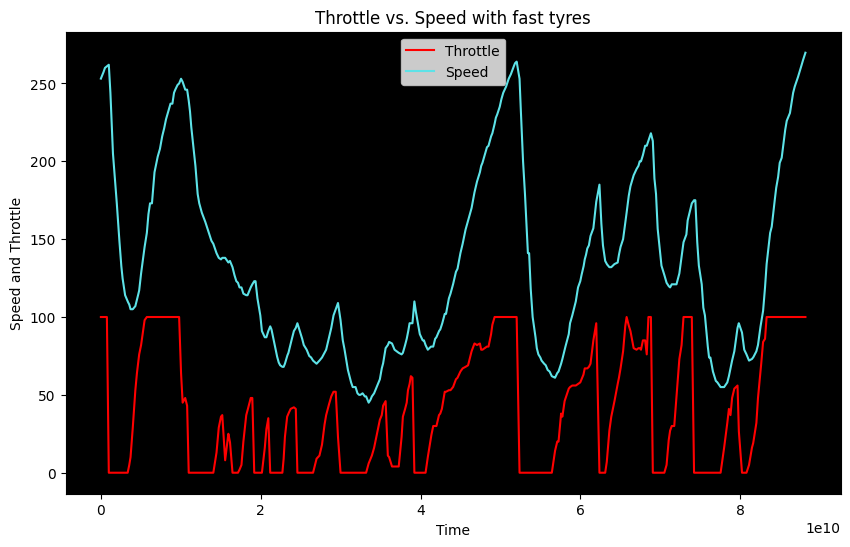

In [31]:
# Now for the telemetry of the of a fast lap with slower tyres
# lap 17 was also on mediums and laptime was a bit slower

lap_13 = driver_laps.pick_lap(30.0)
lap_13_telemetry = lap_13.get_telemetry()

# graph for lap 4 (fast lap)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(lap_13_telemetry['Time'], lap_13_telemetry['Throttle'], color='red')
ax.plot(lap_13_telemetry['Time'], lap_13_telemetry['Speed'], color='#5DE2E7')
ax.set_facecolor('black')
ax.set_xlabel('Time')
ax.set_ylabel('Speed and Throttle')
ax.set_title('Throttle vs. Speed with fast tyres')
ax.legend(labels=['Throttle', 'Speed'])
plt.savefig('plots/throttle_speed.png')

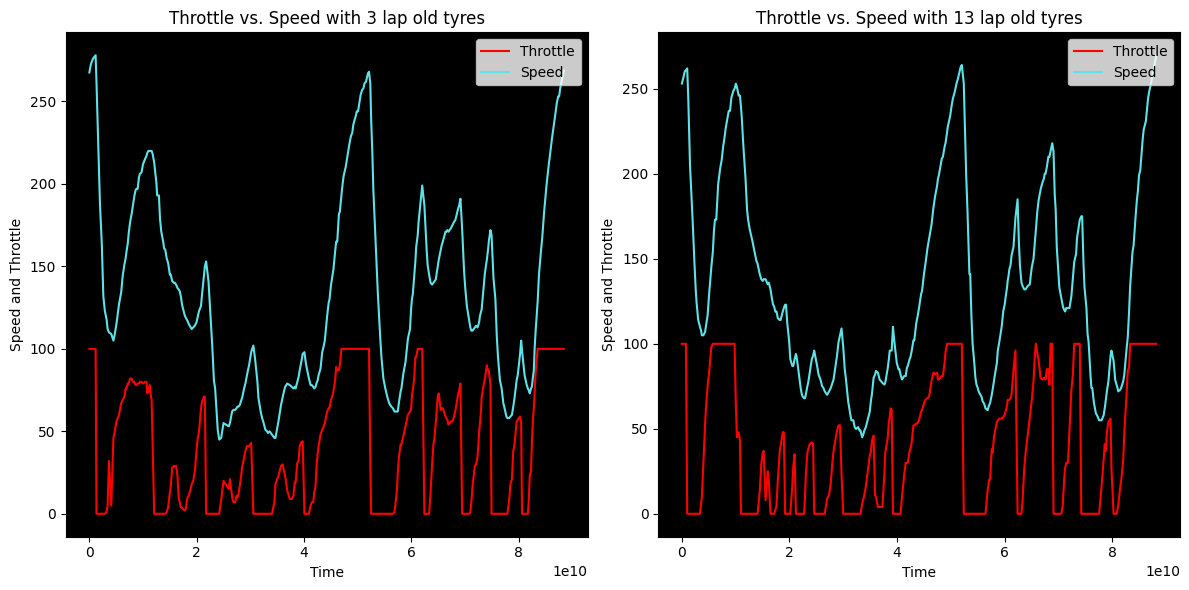

In [32]:
# side by side:

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(lap_3_telemetry['Time'], lap_3_telemetry['Throttle'], color='red')
ax[0].plot(lap_3_telemetry['Time'], lap_3_telemetry['Speed'], color='#5DE2E7')
ax[0].set_facecolor('black')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Speed and Throttle')
ax[0].set_title('Throttle vs. Speed with 3 lap old tyres')
ax[0].legend(labels=['Throttle', 'Speed'])

ax[1].plot(lap_13_telemetry['Time'], lap_13_telemetry['Throttle'], color='red')
ax[1].plot(lap_13_telemetry['Time'], lap_13_telemetry['Speed'], color='#5DE2E7')
ax[1].set_facecolor('black')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Speed and Throttle')
ax[1].set_title('Throttle vs. Speed with 13 lap old tyres')
ax[1].legend(labels=['Throttle', 'Speed'])

plt.tight_layout()
plt.show()

In [36]:
# I will model a tire degradation metric, as 100% being brand new

print(
    lap_3_telemetry['Speed'].max(),
    lap_13_telemetry['Speed'].max()
)

278.0 269.7249989818182


In [ ]:
# tyre life, max speed  lin regression
# Then this can correlate with a Boolean value if the tyre is usable, using logistic regression, using tyre life and max speed again

Get data from other practice sessions - P2 and P3 